박스플롯 (Box Plot)

## 1. 기본 박스플롯 (Matplotlib 사용)

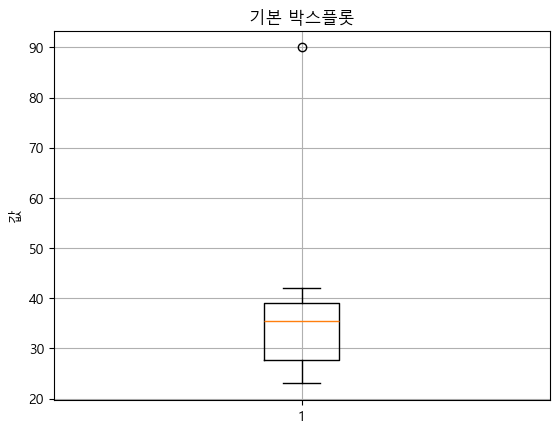

In [2]:
import matplotlib.pyplot as plt

# Windows에서 한글이 잘 보이는 기본 폰트 설정 (예: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

# 예시 데이터
data = [23, 25, 27, 30, 35, 36, 36, 40, 42, 90]

# 박스플롯 그리기
plt.boxplot(data)

# 제목 및 축 설정
plt.title("기본 박스플롯")
plt.ylabel("값")
plt.grid(True)
plt.show()


## 2. 그룹별 박스플롯 (여러 그룹 비교)

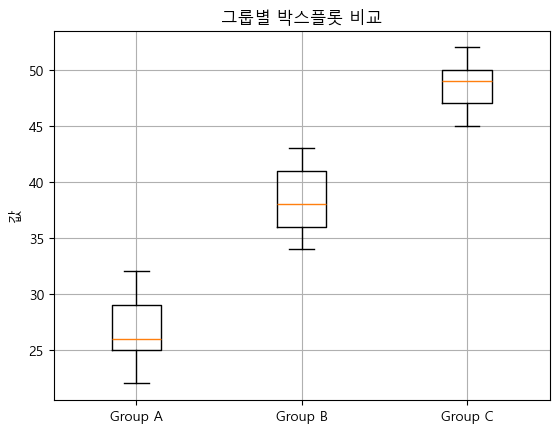

In [3]:
import matplotlib.pyplot as plt

# 그룹별 데이터
group1 = [22, 25, 26, 29, 32]
group2 = [34, 36, 38, 41, 43]
group3 = [45, 47, 49, 50, 52]

# 박스플롯
plt.boxplot([group1, group2, group3], labels=['Group A', 'Group B', 'Group C'])

plt.title("그룹별 박스플롯 비교")
plt.ylabel("값")
plt.grid(True)
plt.show()


## 3. 금융 데이터 기반 박스플롯 (삼성전자 월별 종가 분포)

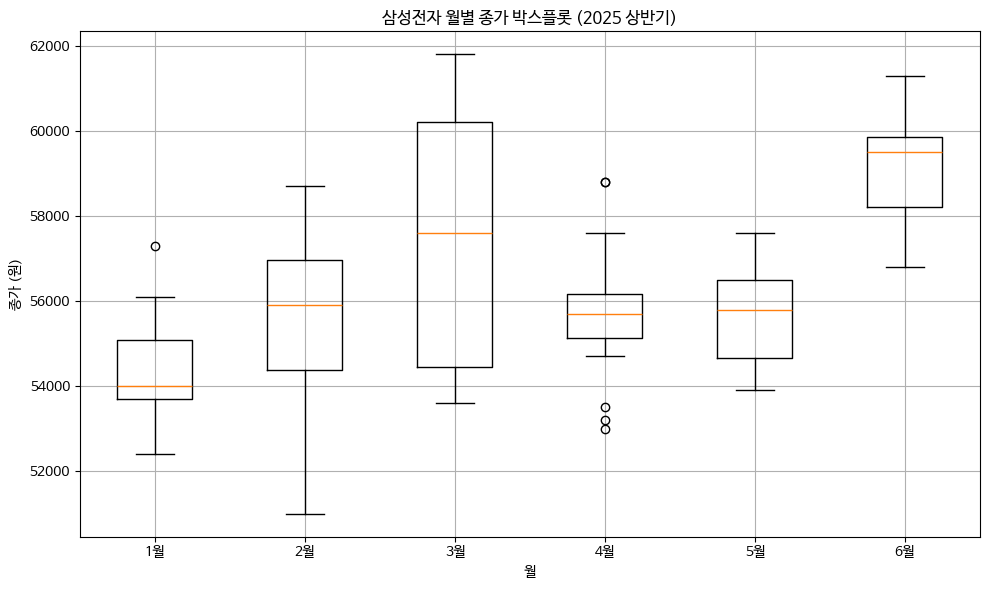

In [5]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = stock.get_market_ohlcv_by_date("2025-01-01", "2025-06-30", "005930")
df.index = pd.to_datetime(df.index)

# 월별로 종가 분리
df['월'] = df.index.month
monthly_prices = [df[df['월'] == m]['종가'] for m in range(1, 7)]  # 1~6월

# 박스플롯 그리기
plt.figure(figsize=(10, 6))
plt.boxplot(monthly_prices, labels=[f"{m}월" for m in range(1, 7)])

plt.title("삼성전자 월별 종가 박스플롯 (2025 상반기)")
plt.xlabel("월")
plt.ylabel("종가 (원)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 4. 연도별(분기별) 박스플롯: 연도 단위로 종가 분포 시각화

### 4-1 연도별

<Figure size 1000x600 with 0 Axes>

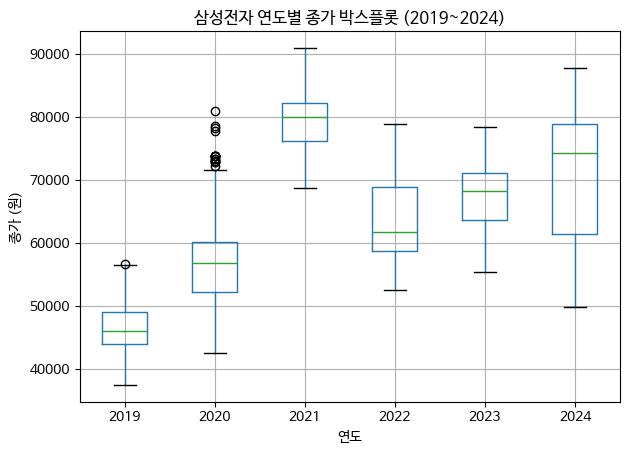

In [7]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 여러 연도에 걸친 종가 데이터 수집
years = range(2019, 2025)
df_list = []

for year in years:
    start = f"{year}-01-01"
    end = f"{year}-12-31"
    df = stock.get_market_ohlcv_by_date(start, end, "005930")[['종가']]
    df['연도'] = year
    df_list.append(df)

# 하나의 데이터프레임으로 결합
all_data = pd.concat(df_list)

# 박스플롯
plt.figure(figsize=(10, 6))
all_data.boxplot(column='종가', by='연도')

plt.title("삼성전자 연도별 종가 박스플롯 (2019~2024)")
plt.suptitle("")
plt.xlabel("연도")
plt.ylabel("종가 (원)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 4-2 분기별 박스플롯: 분기 단위 종가 분포 시각화

<Figure size 1200x600 with 0 Axes>

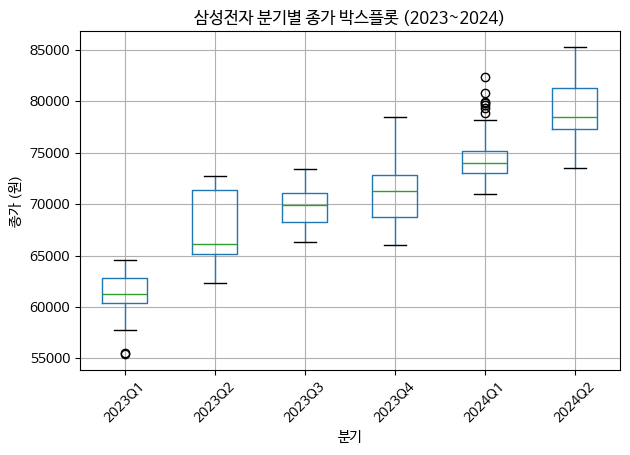

In [8]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 연도 범위 설정
start_date = "2023-01-01"
end_date = "2024-06-30"

# 삼성전자 종가 데이터 불러오기
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")[['종가']]
df.index = pd.to_datetime(df.index)

# 분기 정보 추가
df['분기'] = df.index.to_period("Q").astype(str)  # 예: '2023Q1', '2023Q2', ...

# 박스플롯
plt.figure(figsize=(12, 6))
df.boxplot(column='종가', by='분기', rot=45)

plt.title("삼성전자 분기별 종가 박스플롯 (2023~2024)")
plt.suptitle("")
plt.xlabel("분기")
plt.ylabel("종가 (원)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 4-3 삼성전자 분기별 거래량 박스플롯 (2023~2024)

<Figure size 1200x600 with 0 Axes>

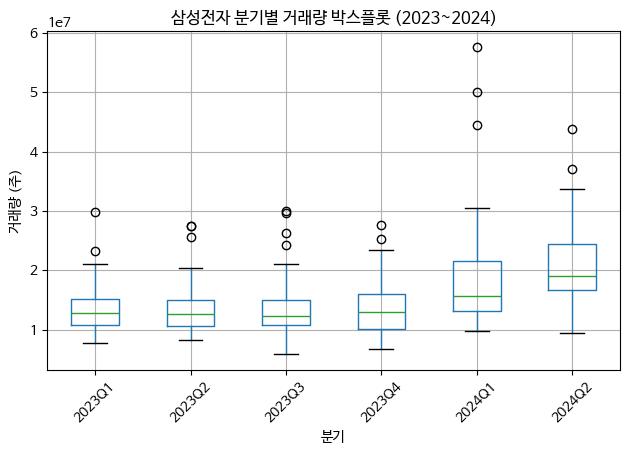

In [9]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 기간 설정
start_date = "2023-01-01"
end_date = "2024-06-30"

# 데이터 가져오기
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df.index = pd.to_datetime(df.index)

# 분기 컬럼 추가 (예: 2023Q1, 2023Q2, ...)
df['분기'] = df.index.to_period("Q").astype(str)

# 박스플롯: 분기별 거래량
plt.figure(figsize=(12, 6))
df.boxplot(column='거래량', by='분기', rot=45)

# 그래프 꾸미기
plt.title("삼성전자 분기별 거래량 박스플롯 (2023~2024)")
plt.suptitle("")  # 기본 제목 제거
plt.xlabel("분기")
plt.ylabel("거래량 (주)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 4-4 전체 코드: 삼성전자 월별 거래량 박스플롯 (2023~2024)

<Figure size 1400x600 with 0 Axes>

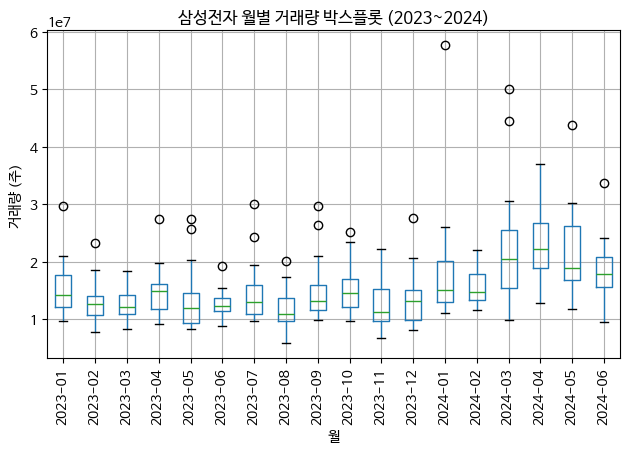

In [10]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# ▶️ 1. 데이터 불러오기
start_date = "2023-01-01"
end_date = "2024-06-30"

df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df.index = pd.to_datetime(df.index)

# ▶️ 2. 월 정보 추출 (형식: '2023-01', '2023-02', ...)
df['월'] = df.index.to_period("M").astype(str)

# ▶️ 3. 박스플롯 그리기
plt.figure(figsize=(14, 6))
df.boxplot(column='거래량', by='월', rot=90)

# ▶️ 4. 그래프 꾸미기
plt.title("삼성전자 월별 거래량 박스플롯 (2023~2024)")
plt.suptitle("")  # 기본 서브타이틀 제거
plt.xlabel("월")
plt.ylabel("거래량 (주)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 5. Seaborn 활용 (Pandas + 스타일 포함)

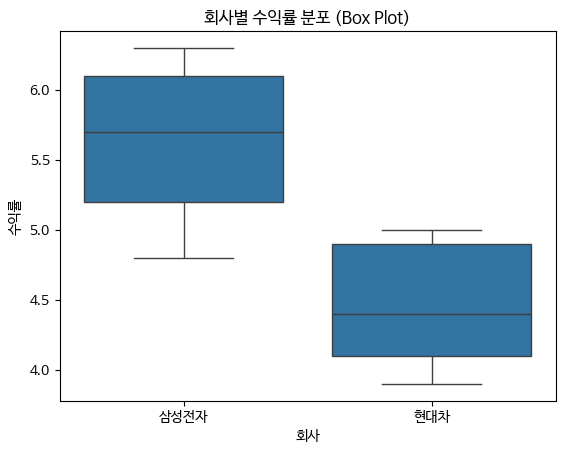

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터프레임
df = pd.DataFrame({
    "회사": ["삼성전자"]*5 + ["현대차"]*5,
    "수익률": [5.2, 6.1, 4.8, 5.7, 6.3, 3.9, 4.1, 4.4, 4.9, 5.0]
})

# 시각화
sns.boxplot(x="회사", y="수익률", data=df)
plt.title("회사별 수익률 분포 (Box Plot)")
plt.show()


 ### 5-2 seaborn으로 그린 삼성전자 월별 거래량 박스플롯

C:\Users\JYB\AppData\Local\Temp\ipykernel_26988\2898860465.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='월', y='거래량', data=df, palette='Blues')


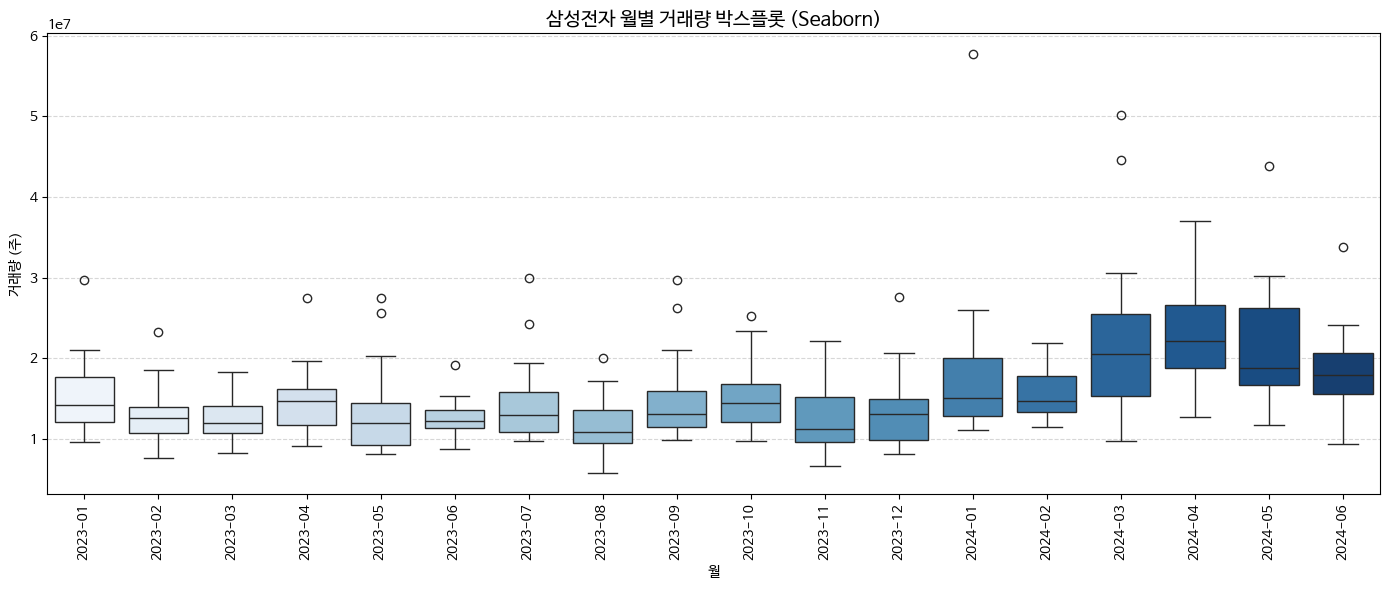

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pykrx import stock

# ▶️ 1. 데이터 가져오기
start_date = "2023-01-01"
end_date = "2024-06-30"
df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df.index = pd.to_datetime(df.index)

# ▶️ 2. 월 정보 컬럼 추가
df['월'] = df.index.strftime('%Y-%m')  # 예: '2023-01', '2023-02'

# ▶️ 3. Seaborn 박스플롯
plt.figure(figsize=(14, 6))
sns.boxplot(x='월', y='거래량', data=df, palette='Blues')

# ▶️ 4. 꾸미기
plt.title('삼성전자 월별 거래량 박스플롯 (Seaborn)', fontsize=14)
plt.xlabel('월')
plt.ylabel('거래량 (주)')
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 5-3 삼성전자 분기별 거래량 박스플롯 (Seaborn 사용)

C:\Users\JYB\AppData\Local\Temp\ipykernel_26988\3486969730.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='분기', y='거래량', data=df, palette='Greens')


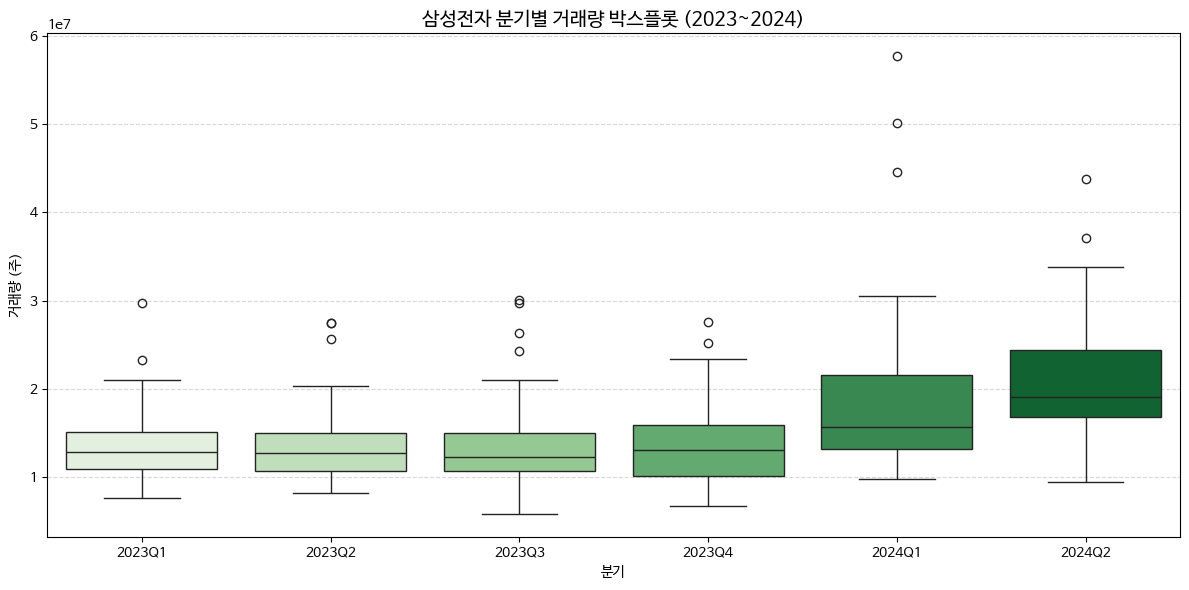

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pykrx import stock

# ▶️ 1. 데이터 불러오기
start_date = "2023-01-01"
end_date = "2024-06-30"

df = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")
df.index = pd.to_datetime(df.index)

# ▶️ 2. 분기 정보 추가 (예: '2023Q1', '2023Q2', ...)
df['분기'] = df.index.to_period("Q").astype(str)

# ▶️ 3. Seaborn 박스플롯 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x='분기', y='거래량', data=df, palette='Greens')

# ▶️ 4. 꾸미기
plt.title('삼성전자 분기별 거래량 박스플롯 (2023~2024)', fontsize=14)
plt.xlabel('분기')
plt.ylabel('거래량 (주)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
